In [90]:
#remember that the cn and xn of n=2 is 1,1, +-sqrt3/3  
using QuadGK
using Calculus
g(x)=4/(1+x^2)
Ic=integrate(g,0,1)
#Ic=pi

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] integrate(::Function, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/juser/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[90], in expression starting on line 5


3.1415926535897936

In [111]:
function gauss(h,a,b)
    f(t)=4/(1+(((b-a)*t+a+b)/2)^2)
    t1=-sqrt(15)/5
    t2=0
    t3=sqrt(15)/5
    I1=( 5/9*f(t1)+8/9*f(t2) +5/9*f(t3))*(b-a)/2
    return I1
end

gauss (generic function with 1 method)

In [112]:
function summedgauss(k)
    h=(1-0)/k
    I=0
    for i=1:k
        a=0+(i-1)*h
        b=0+(i)*h
        I=I+gauss(h,a,b)
    end
    return I
end

summedgauss (generic function with 1 method)

In [113]:
k=1
error=1
while(error>1e-6)
    error=abs(summedgauss(k)-Ic)
    println("in the ",k,"th summed gauass quatrature is I=",summedgauss(k)," with error=",error)
    k=k+1
end

in the 1th summed gauass quatrature is I=3.1410681399631675 with error=0.0005245136266260886
in the 2th summed gauass quatrature is I=3.1415912223828344 with error=1.4312069591682075e-6
in the 3th summed gauass quatrature is I=3.1415926112671038 with error=4.2322689797202884e-8


In [131]:
erroralpha=1
k=1

alpha1=(1/(log10(2)))*log10(abs((summedgauss(k)-Ic)/(summedgauss(2*k)-Ic)))
while (erroralpha!=0)
    alpha=alpha1
    k=k+1
    alpha1=(1/(log10(2)))*log10(abs((summedgauss(k)-Ic)/(summedgauss(2*k)-Ic)))
    erroralpha=alpha1-alpha
    #println(alpha1)
end
#println(alpha1)

In [134]:
for k=1:30
    alpha=(1/(log10(2)))*log10(abs((summedgauss(k)-Ic)/(summedgauss(2*k)-Ic)))
    println("the ",k," th iteration of alpha= ",alpha)
end

the 1 th iteration of alpha= 8.517604136078951
the 2 th iteration of alpha= 7.625049617043236
the 3 th iteration of alpha= 6.05272989757275
the 4 th iteration of alpha= 5.997023723980001
the 5 th iteration of alpha= 5.9985053440812965
the 6 th iteration of alpha= 5.999298747176456
the 7 th iteration of alpha= 5.99953140459993
the 8 th iteration of alpha= 5.999610609385161
the 9 th iteration of alpha= 6.000148747372226
the 10 th iteration of alpha= 5.995979761316352
the 11 th iteration of alpha= 6.000190698986555
the 12 th iteration of alpha= 6.002766804440919
the 13 th iteration of alpha= 5.993055231929281
the 14 th iteration of alpha= 5.990468695256457
the 15 th iteration of alpha= 5.967747469235667
the 16 th iteration of alpha= 5.986699864315423
the 17 th iteration of alpha= 5.9803992653440945
the 18 th iteration of alpha= 6.0370893187352195
the 19 th iteration of alpha= 6.0163018123291
the 20 th iteration of alpha= 5.948710771303145
the 21 th iteration of alpha= 5.914270125974116
th

In [135]:
phi(x)=(x^2)*log(x)
Ir=integrate(phi,1,2)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] integrate(::Function, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/juser/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[135], in expression starting on line 2


1.07061470371541

In [136]:
function summedtreprzoid(n,a,b)
    h=1/2^(n)
    sum=(phi(a)+phi(b))*h/2
    for i=1:2^n-1
        sum=sum+h*phi(i*h+a)
    end
    return sum
end

summedtreprzoid (generic function with 1 method)

In [137]:
function Romberg(a,b)
    R=zeros(4,4)
    for i=1:size(R)[1]
        R[i]= summedtreprzoid(i-1,a,b)
    end
    for j=2:size(R)[1]
        for k=j:size(R)[1]
            R[k,j]=R[k,j-1]+((R[k,j-1]-R[k-1,j-1])/((2^(j-1))^2-1))
        end
    end
    return R
end

Romberg (generic function with 1 method)

In [138]:
a=1
b=2
R=Romberg(a,b)


4×4 Array{Float64,2}:
 1.38629  0.0      0.0      0.0    
 1.1493   1.0703   0.0      0.0    
 1.09027  1.07059  1.07061  0.0    
 1.07553  1.07061  1.07061  1.07061

In [139]:
error=abs(Ir-R[16])

4.976826728508854e-9

In [140]:
function errorsummedtreprzoid(n,a,b)
    h=(b-a)/(n+1)
    sum=(phi(a)+phi(b))*h/2
    for i=1:n
        sum=sum+h*phi(i*h+a)
    end
    return sum-Ir
end

errorsummedtreprzoid (generic function with 1 method)

In [141]:
function summedtreprzoidold(n,a,b,error1,error)   
    while(abs(error1)>error)  
    error1=errorsummedtreprzoid(n,a,b)
    n=n+1
    end
println("We need ",n," (not include a,b) points to reach the ", error ," precision by In(1)(f)")
end

summedtreprzoidold (generic function with 1 method)

In [142]:
n=0
error1=1 #initial set
summedtreprzoidold(n,a,b,error1,error)  

We need 7948 (not include a,b) points to reach the 4.976826728508854e-9 precision by In(1)(f)


In [143]:
function newton(F, dF, x0, precision = 1.e-8)
    x = x0;
    for i = 1:100
        step = - inv(dF(x)) * F(x)
        x = x + step
        if (norm(F(x)) < precision)
            return x
        end
    end
    error("no convergence")
end

newton (generic function with 2 methods)

In [144]:
function backward_euler(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor(T/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        
        G(z) = y[:,i] + h * f(t[i+1], z) - z
        dG(z) = h * df(t[i+1], z) - eye(d)
        y[:,i+1] = newton(G, dG, y[:,i])
    end
    
    return (t, y)
end

backward_euler (generic function with 1 method)

In [145]:
f(t,x)=[
    -x[2]-x[3]
    x[1]+0.1*x[2]
    0.1+x[3]*(x[1]-14)
]

df(t,x)=[
    0 -1 -1
    1 0.1 0
    x[3] 0 x[1]-14
]

df (generic function with 1 method)

In [146]:
t0 = 0.
y0 = [ 10.; 10.;0. ]
h=0.001
T=40;

In [147]:
t,y=backward_euler(f, df, t0, y0, h, T)
y

3×40001 Array{Float64,2}:
 10.0   9.98999      9.97997       9.96993      …  -12.7395      -12.7244    
 10.0  10.011       10.022        10.0329          -15.1395      -15.1537    
  0.0   9.96016e-5   0.000198803   0.000297605       0.00366759    0.00366953

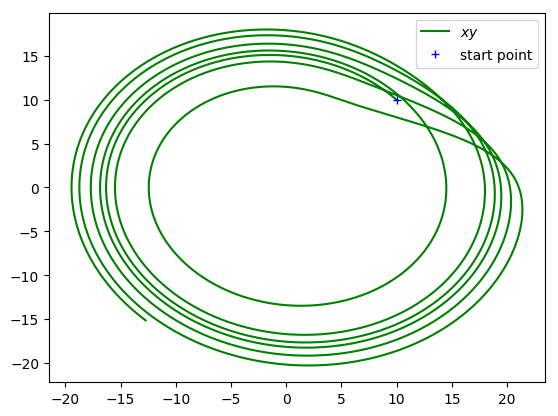

PyObject <matplotlib.legend.Legend object at 0x7f0606cf4910>

In [148]:
using PyPlot

figure()
plot(y[1,:], y[2,:],"g", label="\$x\$\$y\$")
plot([10],[10],"+b",label="start point")
legend()

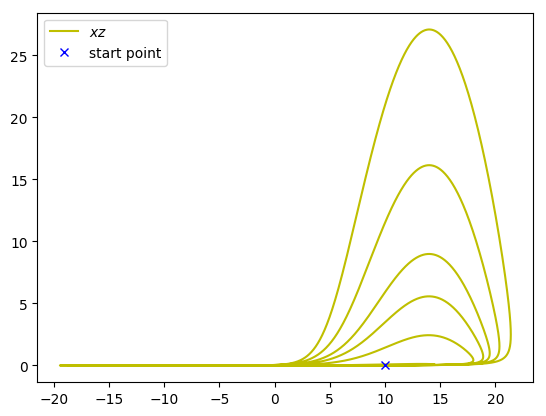

PyObject <matplotlib.legend.Legend object at 0x7f0606c6b590>

In [149]:
plot(y[1,:], y[3,:],"y", label="\$x\$\$z\$")
plot([10],[0],"xb",label="start point")
legend()